<a href="https://colab.research.google.com/github/arunrajvakathanam/predictiveAnalystics/blob/main/Copy_of_Used_car_price_prediction_Final_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data-Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
"""Load DataFrame"""
#df=pd.read_csv('vehicles.csv')
df=pd.read_csv('/content/drive/MyDrive/MLProject/finalmanufacture.csv')
df=pd.DataFrame(df)
df.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [ ]:
#Reindexing DataFrame so that price feature will at last
df= df.reindex(columns=['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long','price'])

###1) Removed Irrelevant features

In [ ]:
df2=df.copy()
df2=df2.drop(columns=['url','region_url','vin','image_url','description','county','state'])
type(df2.info)

method

###2) Dealing with missing values

In [ ]:
df2.isnull().sum() #return series of columns with respective of number of null values

id                 0
region             0
year               0
manufacturer       0
model             37
condition        900
cylinders       1007
fuel              24
odometer          13
title_status      60
transmission       8
drive            782
size            1721
type             477
paint_color      494
lat               19
long              19
price              0
dtype: int64

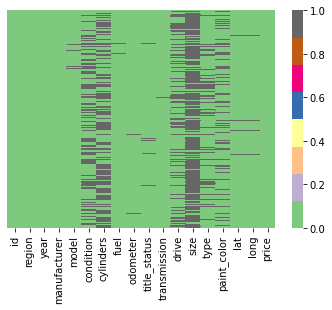

In [ ]:
#heatmap to identify nulll values using graph
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [ ]:
#define numeric variable and categorical variable to work separatly on them
num_col=['year','odometer','lat','long']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

####2.1) Estimating better iterative imputer method

In [ ]:
check_imputer=df2.copy()
check_imputer=check_imputer.drop(columns=['id'])

#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|██████████| 12/12 [00:00<00:00, 567.18it/s]


In [ ]:
#for i in tqdm(range(len(cat_cols))):
check_imputer

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,4,2013.0,0,496,2,4,2,77087.0,0,2,NaN,NaN,6,9,32.590000,-85.480000,20590
1,4,2020.0,0,493,2,4,2,1237.0,0,2,NaN,NaN,6,10,32.590000,-85.480000,39990
2,4,2018.0,0,732,0,NaN,2,55000.0,0,0,1,0,8,10,32.562007,-85.669670,28000
3,10,2005.0,0,731,NaN,4,2,179721.0,NaN,0,1,NaN,8,9,33.209789,-86.783493,5980
4,10,2011.0,0,490,2,4,2,197331.0,0,0,NaN,NaN,0,0,33.739200,-86.772600,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,92,2016.0,23,804,2,NaN,2,57638.0,0,0,1,NaN,11,1,34.620000,-112.420000,23990
2236,104,2019.0,23,641,2,NaN,2,7618.0,0,2,NaN,NaN,8,10,31.590000,-110.170000,36590
2237,104,2013.0,23,636,2,NaN,2,94192.0,0,2,1,NaN,8,0,31.590000,-110.170000,13990
2238,119,2016.0,23,802,2,NaN,4,45682.0,0,2,NaN,NaN,6,0,32.210000,-110.960000,24990


In [ ]:
check_imputer.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,4,2013.0,0,496,2,4,2,77087.0,0,2,NaN,NaN,6,9,32.590000,-85.480000,20590
1,4,2020.0,0,493,2,4,2,1237.0,0,2,NaN,NaN,6,10,32.590000,-85.480000,39990
2,4,2018.0,0,732,0,NaN,2,55000.0,0,0,1,0,8,10,32.562007,-85.669670,28000
3,10,2005.0,0,731,NaN,4,2,179721.0,NaN,0,1,NaN,8,9,33.209789,-86.783493,5980
4,10,2011.0,0,490,2,4,2,197331.0,0,0,NaN,NaN,0,0,33.739200,-86.772600,6000


In [ ]:
# Estimate the score on the entire dataset by filling missing values by mean and median

br_estimator = BayesianRidge() #base estimator
N_SPLITS = 6  #defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer
#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
    y = np.ravel(check_imputer.iloc[:,-1:])
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [ ]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer


#estimators for IterativeImputer
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        for col in check_imputer.columns:
            #col=check_imputer.columns[i]
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


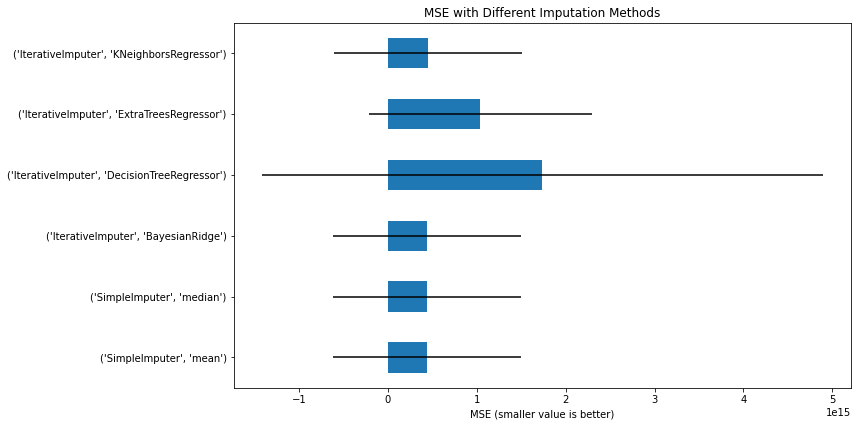

In [ ]:
#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

####2.2) Filling Numerical Missing Values i.e year & odometer

In [ ]:
df2.isnull().sum()[num_col]


year         0
odometer    13
lat         19
long        19
dtype: int64

In [ ]:
data_num=df2[num_col]
imputer_num=IterativeImputer(estimators[0]) #estimators[0] = Bayesian Ridge
impute_data=imputer_num.fit_transform(data_num)
df2[num_col]=impute_data

In [ ]:
#Missing values after filling
df2.isnull().sum()[num_col]

year        0
odometer    0
lat         0
long        0
dtype: int64

####2.4) Filling Categorical values|

In [ ]:
#Missing values before filling
df2.isnull().sum()[cat_cols]

region             0
manufacturer       0
model             37
condition        900
cylinders       1007
fuel              24
title_status      60
transmission       8
drive            782
size            1721
type             477
paint_color      494
dtype: int64

In [ ]:
data_cat=df2[cat_cols]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
df2[cat_cols]=data_cat

In [ ]:
#Missing values after filling
df2.isnull().sum()[cat_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

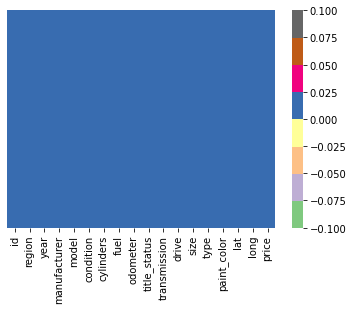

In [ ]:
#Heat map tp check numm values visually
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [ ]:
#No null value in the dataset
df2.isnull().sum()

id              0
region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [ ]:
df2.to_csv('vehiclesData.csv',index=False)
df2=pd.read_csv('vehiclesData.csv')

###3) Outliers

In [ ]:
from IPython.display import display,Latex
outliers_condi=Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info=Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

In [ ]:
display(outliers_info)
display(outliers_condi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])

    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])

    #q1,q3=(arr[col].quantile([0.25,0.75]))

    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

####3.1) Price

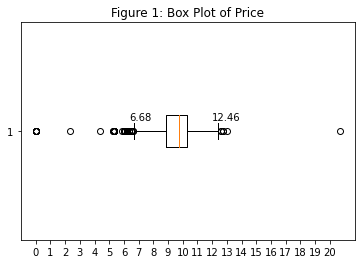

In [ ]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df2['logprice'] = np.log(df2['price'])
x=df2['logprice']
price_range=list(range(0,int(max(df2['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df2)[0]-0.3,1.05,str(round(min_max_price(df2)[0],2)))
plt.text(min_max_price(df2)[1]-0.5,1.05,str(round(min_max_price(df2)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

####3.2) Odometer

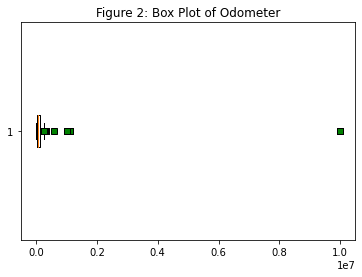

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df2['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

####3.3) Year

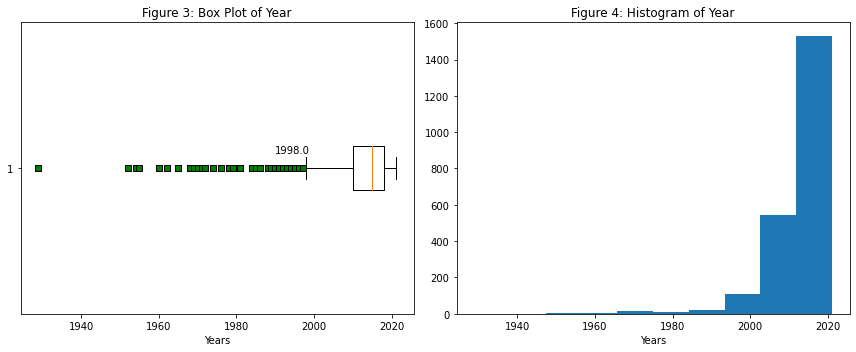

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(df2,'year')
ax1.boxplot(sorted(df2['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df2['year'])
n, bins, patches = ax2.hist(x=df2['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

In [ ]:
#removing outliers
df_new=df2.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.68422287129966 12.461773069851013
IQR of odometer = -120197.5 257718.5
IQR of year = 1998.0 2030.0


In [ ]:
df_new.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7309271051,auburn,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,fwd,full-size,other,silver,32.590000,-85.480000,20590
1,7305149985,auburn,2020.0,acura,mdx sh-awd sport utility,good,6 cylinders,gas,1237.0,clean,other,fwd,full-size,other,white,32.590000,-85.480000,39990
2,7302286548,auburn,2018.0,acura,tlx,excellent,5 cylinders,gas,55000.0,clean,automatic,fwd,compact,sedan,white,32.562007,-85.669670,28000
3,7315923364,birmingham,2005.0,acura,tl,fair,6 cylinders,gas,179721.0,clean,automatic,fwd,full-size,sedan,silver,33.209789,-86.783493,5980
4,7315125503,birmingham,2011.0,acura,mdx,good,6 cylinders,gas,197331.0,clean,automatic,fwd,full-size,SUV,black,33.739200,-86.772600,6000


In [ ]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehiclesFinal.csv",index=False)

Shape before process= (2240, 25)
Shape After process= (1964, 18)
Total 276 rows and 7 cols removed


#Data-Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("vehiclesFinal.csv")
df['year']=df['year'].astype('int64')
df.drop(['lat','long','id'],axis=1,inplace=True)
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,auburn,2013,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,fwd,full-size,other,silver,20590
1,auburn,2020,acura,mdx sh-awd sport utility,good,6 cylinders,gas,1237.0,clean,other,fwd,full-size,other,white,39990
2,auburn,2018,acura,tlx,excellent,5 cylinders,gas,55000.0,clean,automatic,fwd,compact,sedan,white,28000
3,birmingham,2005,acura,tl,fair,6 cylinders,gas,179721.0,clean,automatic,fwd,full-size,sedan,silver,5980
4,birmingham,2011,acura,mdx,good,6 cylinders,gas,197331.0,clean,automatic,fwd,full-size,SUV,black,6000


In [ ]:
df.shape

(1964, 15)

In [ ]:
df.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price'],
      dtype='object')

In [ ]:
df2=df.sample(100)
df2.shape
df2

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
815,birmingham,2003,honda,civic ex,excellent,4 cylinders,gas,236890.0,clean,automatic,fwd,full-size,offroad,grey,3950
343,birmingham,2017,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,fwd,full-size,pickup,white,24590
1603,birmingham,2013,tesla,model s,fair,5 cylinders,electric,61591.0,clean,automatic,rwd,full-size,sedan,grey,29890
713,"washington, DC",2015,harley-davidson,davidson sportster 1200 c,fair,5 cylinders,gas,1466.0,clean,manual,fwd,full-size,other,black,7995
1798,huntsville / decatur,2010,volkswagen,passat wagon,fair,5 cylinders,gas,107033.0,clean,automatic,fwd,full-size,offroad,grey,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,auburn,2001,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,22500
370,birmingham,2019,chevrolet,silverado 1500 ld,good,5 cylinders,other,6897.0,clean,other,fwd,full-size,pickup,black,32990
1918,anchorage / mat-su,2018,volvo,xc60,excellent,4 cylinders,gas,39000.0,clean,automatic,4wd,mid-size,SUV,green,46900
331,birmingham,2010,chevrolet,corvette convertible,good,8 cylinders,gas,31879.0,clean,other,rwd,full-size,other,red,35590


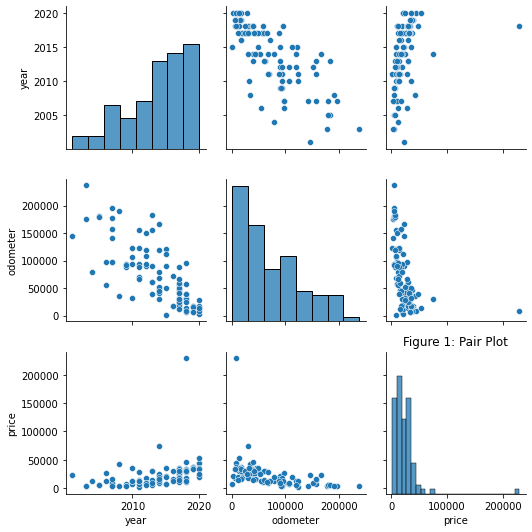

In [ ]:
sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

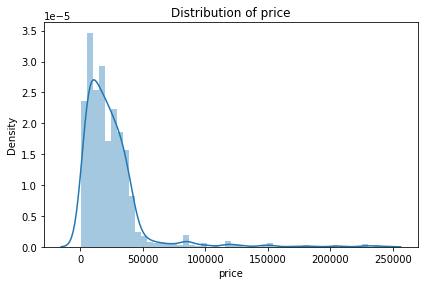

In [ ]:
sns.distplot(df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

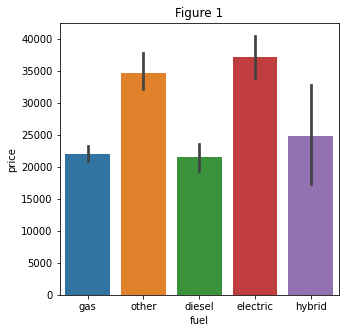

In [ ]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=df,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

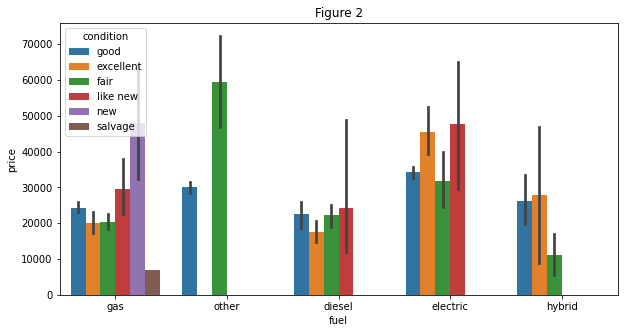

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=df)
plt.title('Figure 2')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

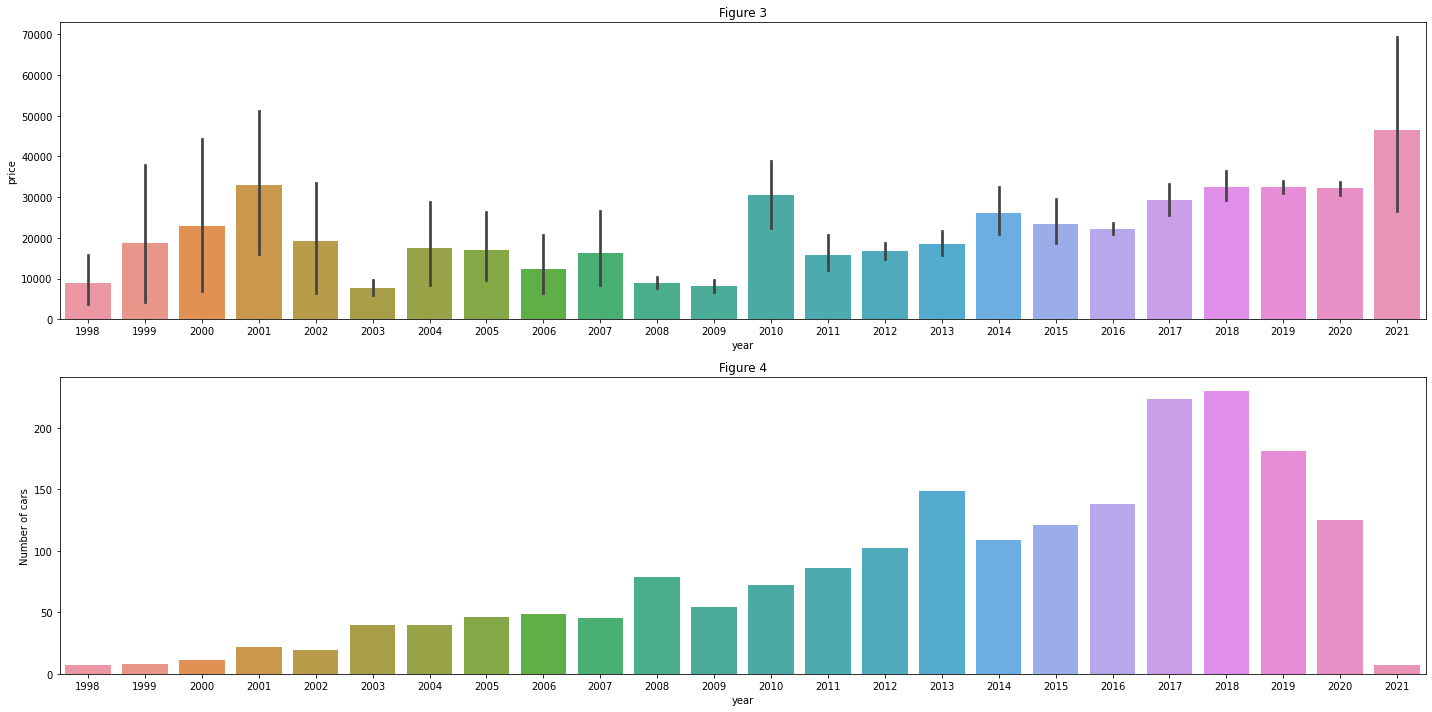

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=df,ax=axs[0])
sns.barplot(df.groupby('year').count()['price'].index,df.groupby('year').count()['price'].values,ax=axs[1])
axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.savefig('Insight-Figure-3-4.jpg',dpi=600)
plt.show()

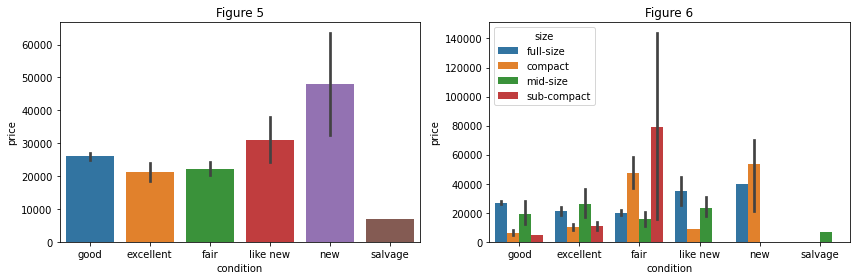

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='condition',y='price',data=df,ax=axs[0])
sns.barplot(x='condition',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('Figure 5')
axs[1].set_title('Figure 6')
plt.tight_layout()
plt.savefig('Insight-Figure-5-6.jpg',dpi=600)
plt.show()

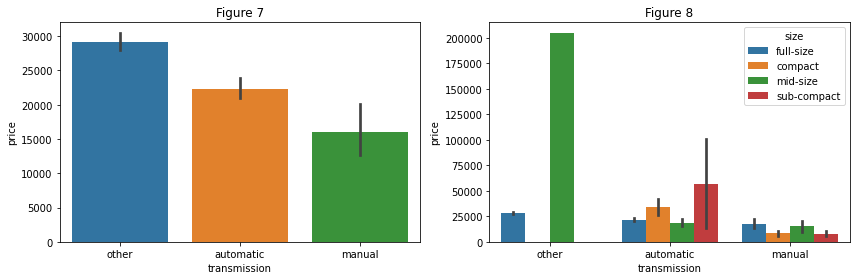

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='transmission',y='price',data=df,ax=axs[0])
sns.barplot(x='transmission',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('Figure 7')
axs[1].set_title('Figure 8')
plt.tight_layout()
plt.savefig('Insight-Figure-7-8.jpg',dpi=600)
plt.show()

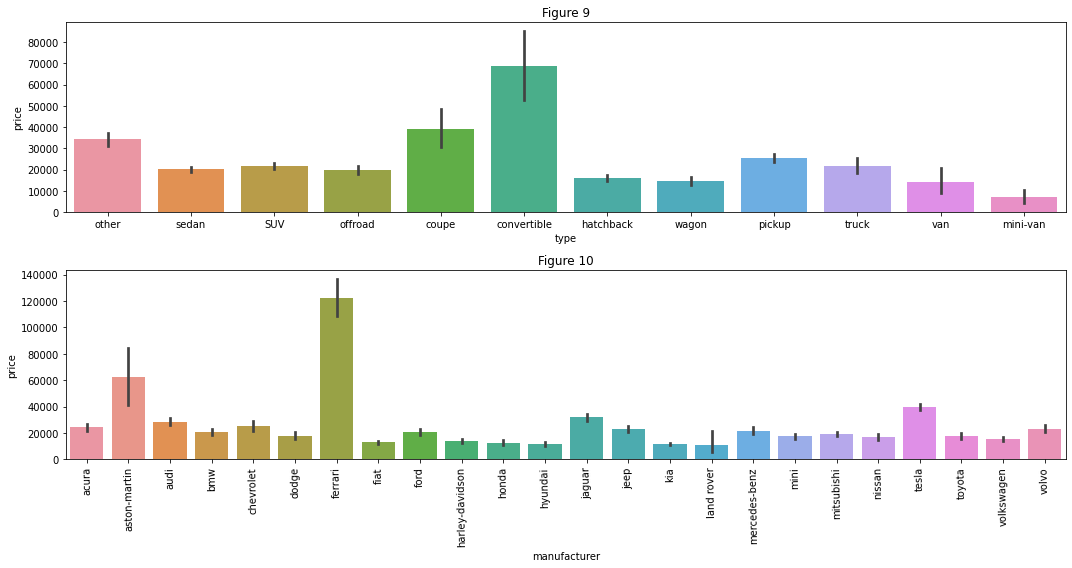

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 9')
axs[1].set_title('Figure 10')
plt.tight_layout()
plt.savefig('Insight-Figure-9-10.jpg',dpi=600)
plt.show()

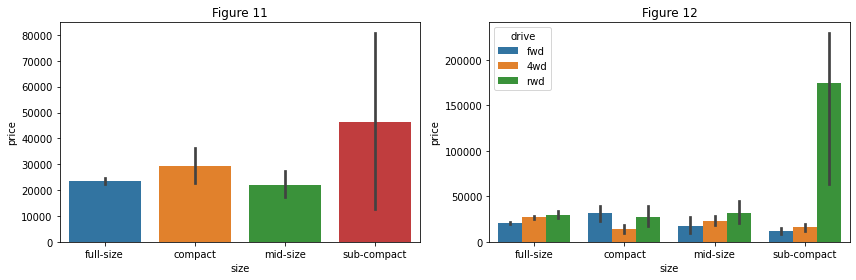

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=df,ax=axs[0])
sns.barplot(x='size',y='price',hue='drive',data=df,ax=axs[1])
axs[0].set_title('Figure 11')
axs[1].set_title('Figure 12')
plt.tight_layout()
plt.savefig('Insight-Figure-11-12.jpg',dpi=600)
plt.show()

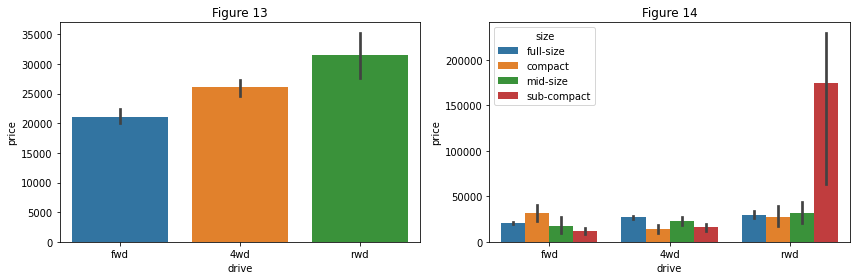

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='drive',y='price',data=df,ax=axs[0])
sns.barplot(x='drive',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('Figure 13')
axs[1].set_title('Figure 14')
plt.tight_layout()
plt.savefig('Insight-Figure-13-14.jpg',dpi=600)
plt.show()

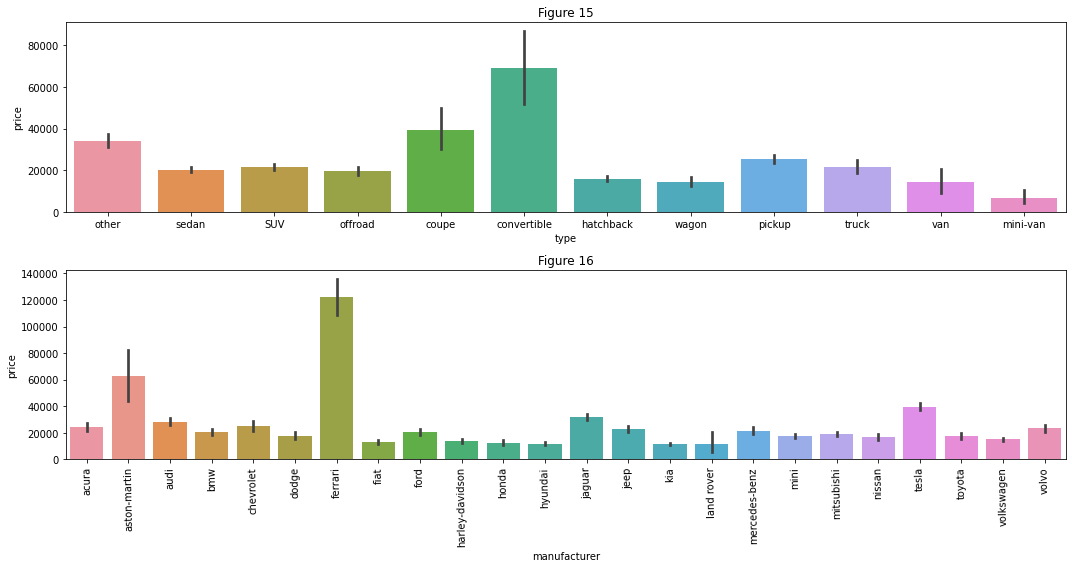

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 15')
axs[1].set_title('Figure 16')
plt.tight_layout()
plt.show()

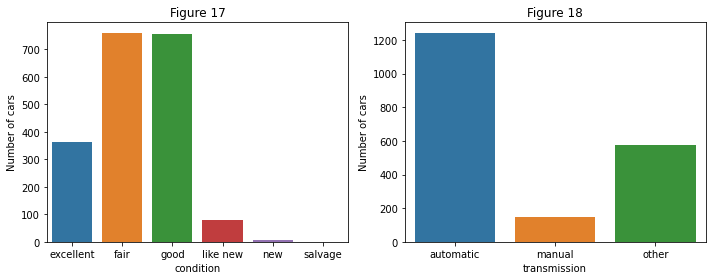

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(df.groupby('condition').count()['price'].index,df.groupby('condition').count()['price'].values,ax=axs[0])
sns.barplot(df.groupby('transmission').count()['price'].index,df.groupby('transmission').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 17')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 18')
plt.tight_layout()
plt.show()

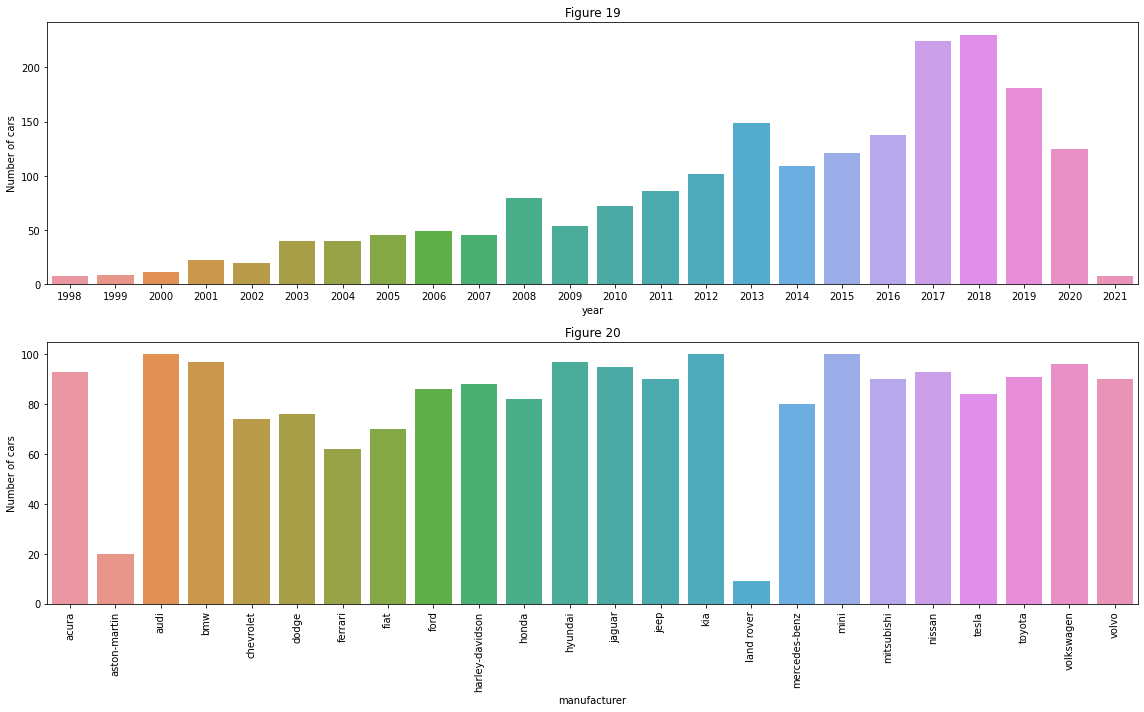

In [ ]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(df.groupby('year').count()['price'].index,df.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(df.groupby('manufacturer').count()['price'].index,df.groupby('manufacturer').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 19')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 20')
axs[1].set_xticklabels(df.groupby('manufacturer').count()['price'].index,rotation=90)
plt.tight_layout()
plt.show()

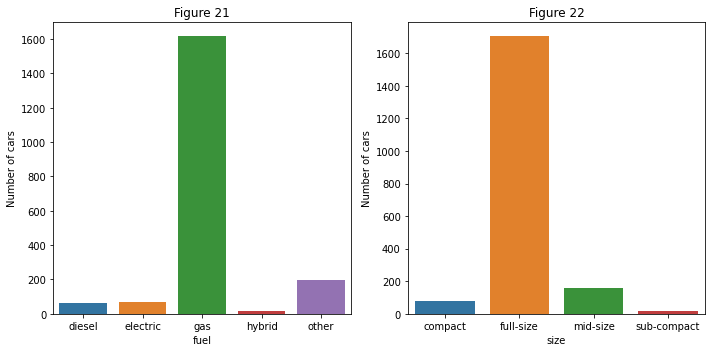

In [ ]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,5)
sns.barplot(df.groupby('fuel').count()['price'].index,df.groupby('fuel').count()['price'].values,ax=axs[0])
sns.barplot(df.groupby('size').count()['price'].index,df.groupby('size').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 21')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 22')
plt.tight_layout()
plt.show()

#ML-Models

In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Dataframe

df=pd.read_csv("vehiclesFinal.csv")
#df=pd.read_csv("")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)

"""df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)
df=df.drop('region',axis=1)"""

df2=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,auburn,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,fwd,full-size,other,silver,32.590000,-85.480000,20590
1,auburn,2020.0,acura,mdx sh-awd sport utility,good,6 cylinders,gas,1237.0,clean,other,fwd,full-size,other,white,32.590000,-85.480000,39990
2,auburn,2018.0,acura,tlx,excellent,5 cylinders,gas,55000.0,clean,automatic,fwd,compact,sedan,white,32.562007,-85.669670,28000
3,birmingham,2005.0,acura,tl,fair,6 cylinders,gas,179721.0,clean,automatic,fwd,full-size,sedan,silver,33.209789,-86.783493,5980
4,birmingham,2011.0,acura,mdx,good,6 cylinders,gas,197331.0,clean,automatic,fwd,full-size,SUV,black,33.739200,-86.772600,6000


In [ ]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

###1) Transforming categorical columns values into integer values

In [ ]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [ ]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,4,2013.0,0,432,2,4,2,77087.0,0,2,1,1,6,9,32.59,-85.48,20590
1,4,2020.0,0,429,2,4,2,1237.0,0,2,1,1,6,10,32.59,-85.48,39990


###2) Scaling Dataset

In [ ]:
#scaling numerical data

norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [ ]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,-0.952527,-0.114787,0,0.296616,2,4,2,0.069357,0,2,1,1,6,9,-0.472039,0.544854,9.932561
1,-0.952527,1.243775,0,0.282281,2,4,2,-1.167360,0,2,1,1,6,10,-0.472039,0.544854,10.596385


In [ ]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [ ]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

###3) Model Implementation
####1)Linear Regression
####2)Ridge Regression
####3)Lasso Regression
####4)K-Neighbors Regressor
####5)Random Forest Regressor
####6)Bagging Regressor
####7)Adaboost Regressor
####8)XGBoost

####1)Linear Regression

In [ ]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [ ]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 0.00716304  0.23115175 -0.00585006  0.02553069  0.04043794  0.22577694
 -0.04040271 -0.4251614  -0.11764517 -0.05482964  0.0028622  -0.05238706
 -0.00177485  0.00605116  0.06505964  0.01133944]
MSLE : 0.0024584253934141318
Root MSLE : 0.04958251096318269
R2 Score : 0.6250840274996816 or 62.5084%


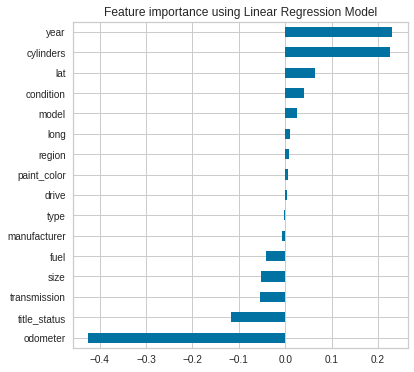

In [ ]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

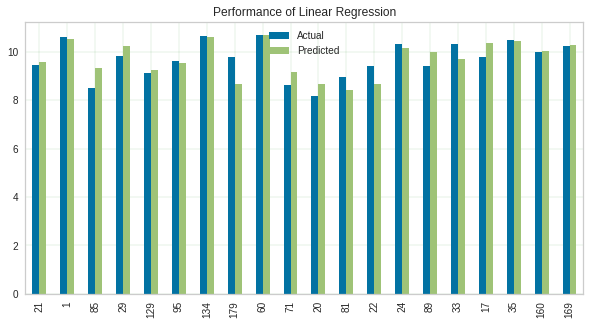

In [ ]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

####3.2) Ridge regression

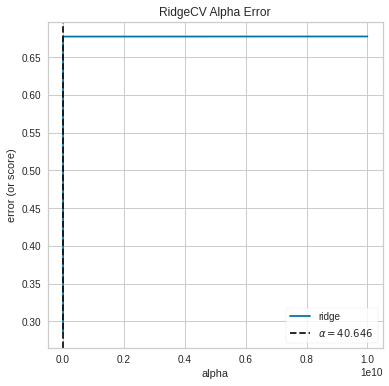

In [ ]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [ ]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [ ]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0024613172899423945
Root MSLE : 0.04961166485759568
R2 Score : 0.6245821497015465 or 62.4582%


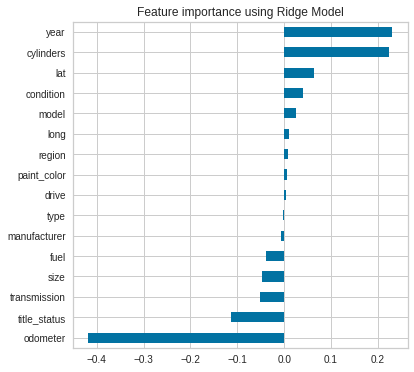

In [ ]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

####3.3) Lasso Regression

In [ ]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [ ]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0024588601126503446
Root MSLE : 0.04958689456550334
R2 Score : 0.6250016511288883 or 62.5002%


####3.4) KNN

In [ ]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.043355863417413466
K = 2  , Root MSLE = 0.0415333330891783
K = 3  , Root MSLE = 0.042802173083766
K = 4  , Root MSLE = 0.043982962480673175
K = 5  , Root MSLE = 0.045921597393364134
K = 6  , Root MSLE = 0.04628754357304879
K = 7  , Root MSLE = 0.0469444066911952
K = 8  , Root MSLE = 0.04699451494846987
K = 9  , Root MSLE = 0.047644622232488366


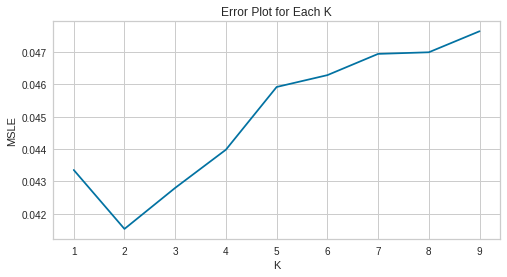

In [ ]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [ ]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [ ]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.002108793107158228
Root MSLE : 0.045921597393364134
R2 Score : 0.6965547714539437 or 69.6555%


In [ ]:
accu.to_csv('errors.csv')

####5) Random Forest

In [ ]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.001034679107489552
Root MSLE : 0.032166428267520655
R2 Score : 0.8477317707811957 or 84.7732%


In [ ]:
"""from sklearn.tree import export_graphviz
import pydot
# Saving feature names for later use
feature_list = list(X_train.columns)
# Convert to numpy array
features = np.array(features)
# Extract the small tree
tree_small = RFR.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png');"""

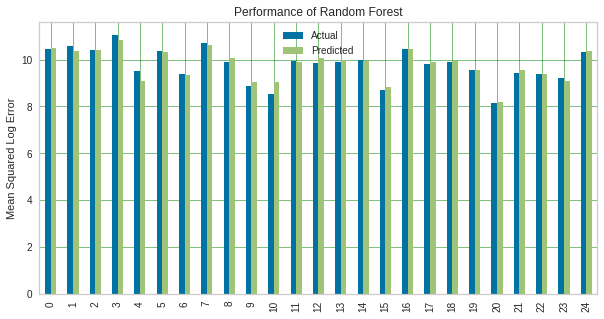

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

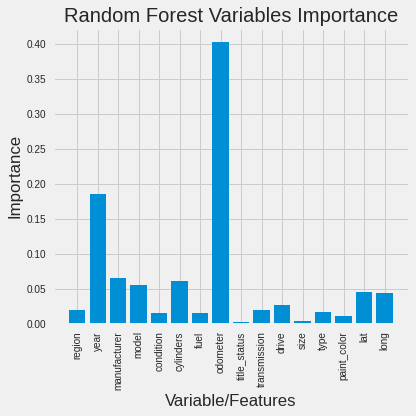

In [ ]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance');
plt.xlabel('Variable/Features');
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

####6) Bagging Regressor

In [ ]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False,
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [ ]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0019142998200196222
Root MSLE : 0.043752712144730206
R2 Score : 0.7126185152790299 or 71.2619%


In [ ]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

####7) Adaboost

In [ ]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [ ]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0005023675536958847
Root MSLE : 0.022413557363700317
R2 Score : 0.9275650954449234 or 92.7565%


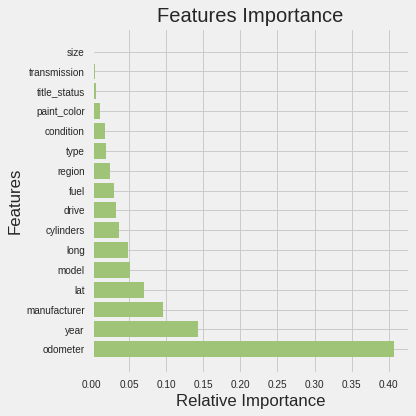

In [ ]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [ ]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

####8) XGBOOST

In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [ ]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005629372975456323
Root MSLE : 0.02372629970192639
R2 Score : 0.9175833918712055 or 91.7583%


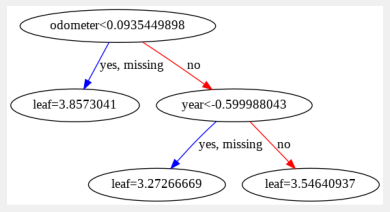

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show();

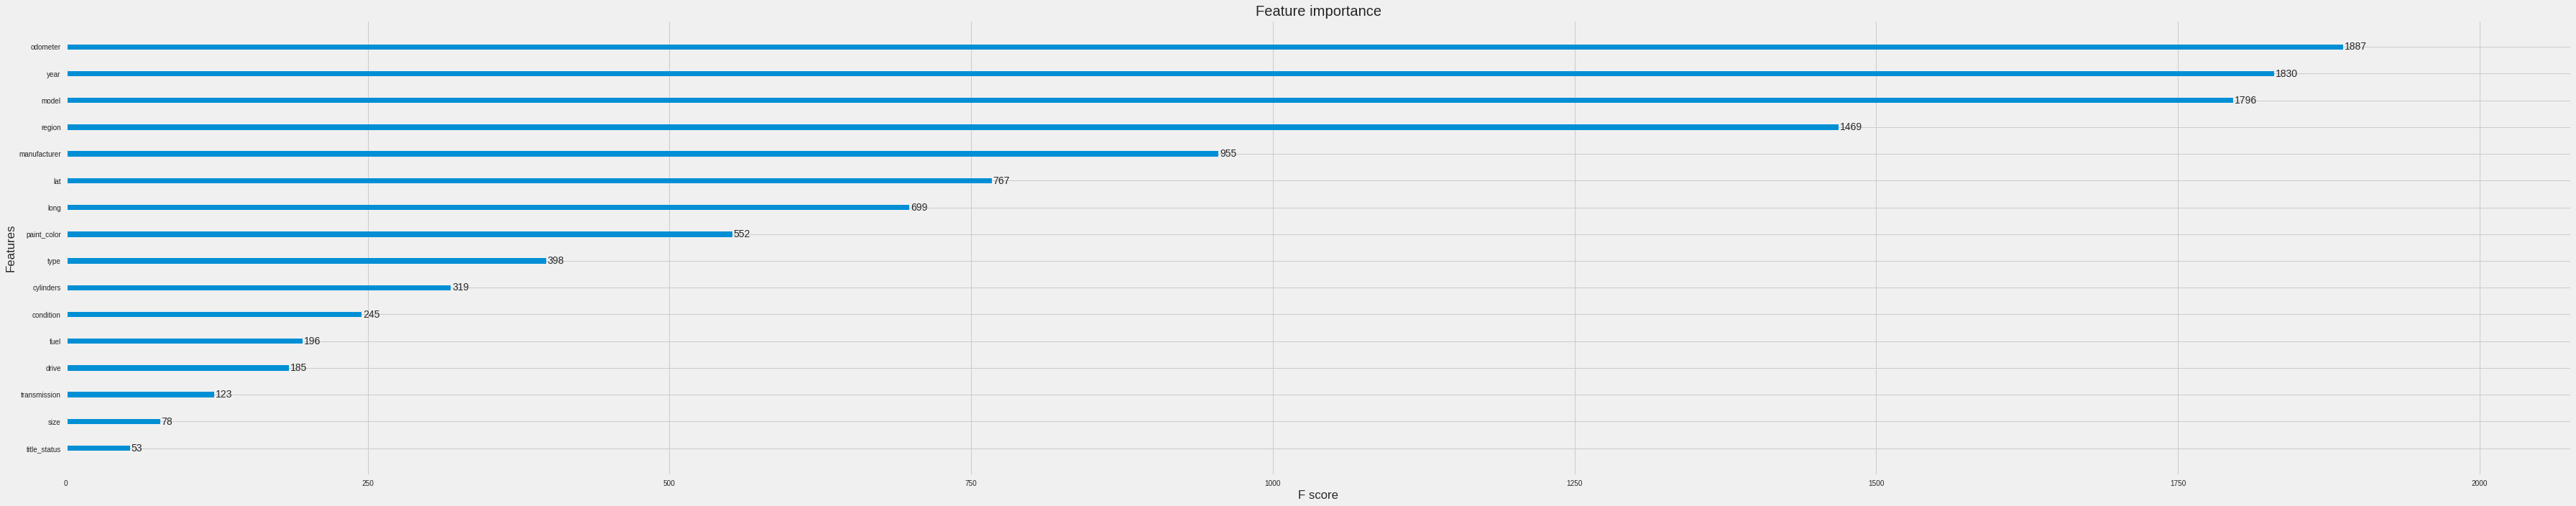

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [ ]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

###Overall Result

In [ ]:
accu=pd.read_csv('errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.002458,0.002461,0.002459,0.002109,0.001035,0.001914,0.000502,0.000563
Root MSLE,0.049583,0.049612,0.049587,0.045922,0.032166,0.043753,0.022414,0.023726
R2 Score,0.625084,0.624582,0.625002,0.696555,0.847732,0.712619,0.927565,0.917583
Accuracy(%),62.508400,62.458200,62.500200,69.655500,84.773200,71.261900,92.756500,91.758300


In [ ]:
model_accuracy=accu.loc['Accuracy(%)']

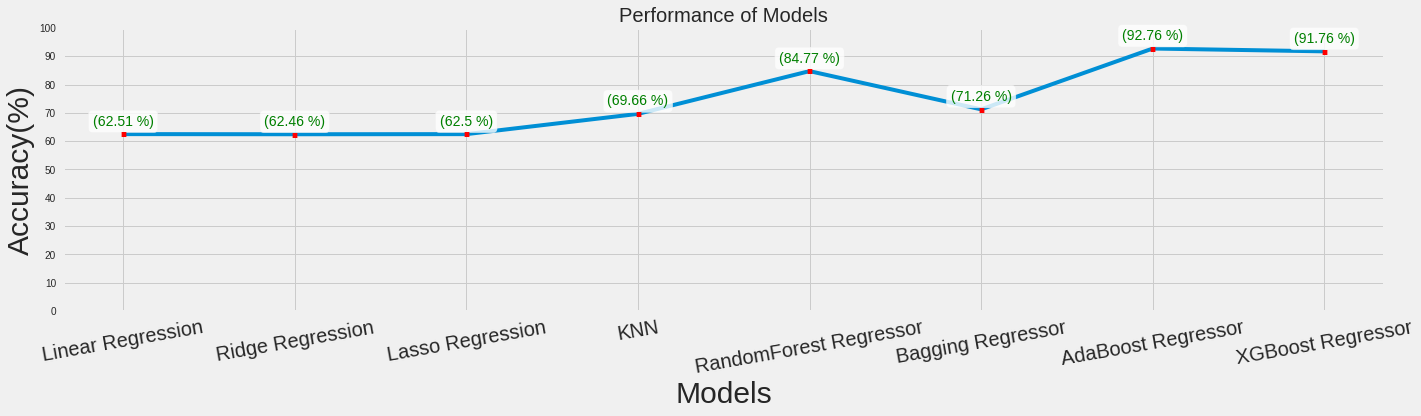

In [ ]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

#Deployment

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pickle

In [ ]:
df=pd.read_csv('vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7309271051,auburn,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,fwd,full-size,other,silver,32.590000,-85.480000,20590
1,7305149985,auburn,2020.0,acura,mdx sh-awd sport utility,good,6 cylinders,gas,1237.0,clean,other,fwd,full-size,other,white,32.590000,-85.480000,39990
2,7302286548,auburn,2018.0,acura,tlx,excellent,5 cylinders,gas,55000.0,clean,automatic,fwd,compact,sedan,white,32.562007,-85.669670,28000
3,7315923364,birmingham,2005.0,acura,tl,fair,6 cylinders,gas,179721.0,clean,automatic,fwd,full-size,sedan,silver,33.209789,-86.783493,5980
4,7315125503,birmingham,2011.0,acura,mdx,good,6 cylinders,gas,197331.0,clean,automatic,fwd,full-size,SUV,black,33.739200,-86.772600,6000


In [ ]:
df2=df.copy()
df.drop(['id','title_status','lat','long','model','region'],axis=1,inplace=True)
df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,price
0,2013.0,acura,good,6 cylinders,gas,77087.0,other,fwd,full-size,other,silver,20590
1,2020.0,acura,good,6 cylinders,gas,1237.0,other,fwd,full-size,other,white,39990
2,2018.0,acura,excellent,5 cylinders,gas,55000.0,automatic,fwd,compact,sedan,white,28000
3,2005.0,acura,fair,6 cylinders,gas,179721.0,automatic,fwd,full-size,sedan,silver,5980
4,2011.0,acura,good,6 cylinders,gas,197331.0,automatic,fwd,full-size,SUV,black,6000


In [ ]:
df2[df2.year==2012.0].head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
72,7314965038,huntsville / decatur,2012.0,acura,tsx sedan 4d,good,5 cylinders,other,71123.0,clean,other,fwd,full-size,sedan,black,34.570000,-86.980000,15590
146,7312927040,huntsville / decatur,2012.0,audi,q7,fair,6 cylinders,diesel,164360.0,clean,automatic,fwd,full-size,SUV,white,36.138037,-86.731163,14989
153,7307668583,huntsville / decatur,2012.0,audi,q5,fair,6 cylinders,gas,154728.0,clean,automatic,4wd,full-size,SUV,silver,34.737481,-86.653907,13419
154,7307267237,huntsville / decatur,2012.0,audi,q7,fair,6 cylinders,diesel,164360.0,clean,automatic,fwd,full-size,SUV,white,36.138037,-86.731163,14989
181,7316010376,tuscaloosa,2012.0,audi,q5 2.0t premium plus,good,5 cylinders,gas,106605.0,clean,automatic,fwd,full-size,SUV,white,33.182080,-87.474689,11200


In [ ]:
num_col=['year','odometer']
cat_cols=['manufacturer','condition','cylinders','fuel','transmission','drive','size','type','paint_color']

In [ ]:
temp=[]
for i in cat_cols:
   temp.append(df[i].unique().flatten())

In [ ]:
temp

[array(['acura', 'aston-martin', 'audi', 'bmw', 'chevrolet', 'dodge',
        'ferrari', 'fiat', 'ford', 'harley-davidson', 'honda', 'hyundai',
        'jaguar', 'jeep', 'kia', 'land rover', 'mercedes-benz', 'mini',
        'mitsubishi', 'nissan', 'tesla', 'toyota', 'volkswagen', 'volvo'],
       dtype=object),
 array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 array(['6 cylinders', '5 cylinders', '4 cylinders', '12 cylinders',
        '8 cylinders', 'other', '3 cylinders'], dtype=object),
 array(['gas', 'other', 'diesel', 'electric', 'hybrid'], dtype=object),
 array(['other', 'automatic', 'manual'], dtype=object),
 array(['fwd', '4wd', 'rwd'], dtype=object),
 array(['full-size', 'compact', 'mid-size', 'sub-compact'], dtype=object),
 array(['other', 'sedan', 'SUV', 'offroad', 'coupe', 'convertible',
        'hatchback', 'wagon', 'pickup', 'truck', 'van', 'mini-van'],
       dtype=object),
 array(['silver', 'white', 'black', 'grey', 'brown', 'red'

In [ ]:
df[cat_cols]=df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          1963 non-null   float64 
 1   manufacturer  1963 non-null   category
 2   condition     1963 non-null   category
 3   cylinders     1963 non-null   category
 4   fuel          1963 non-null   category
 5   odometer      1963 non-null   float64 
 6   transmission  1963 non-null   category
 7   drive         1963 non-null   category
 8   size          1963 non-null   category
 9   type          1963 non-null   category
 10  paint_color   1963 non-null   category
 11  price         1963 non-null   int64   
dtypes: category(9), float64(2), int64(1)
memory usage: 66.1 KB


In [ ]:
columnsValue={}
for col in cat_cols:
    column_labels=list(range(1,len(df[col].unique())+1))
    rep={}
    for i,j in zip(column_labels,df[col].unique()):
        rep[j]=i
    columnsValue[col]=list(df[col].unique())
    df[col].replace(rep,inplace=True)

In [ ]:
df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,price
0,2013.0,1,1,1,1,77087.0,1,1,1,1,1,20590
1,2020.0,1,1,1,1,1237.0,1,1,1,1,2,39990
2,2018.0,1,2,2,1,55000.0,2,1,2,2,2,28000
3,2005.0,1,3,1,1,179721.0,2,1,1,2,1,5980
4,2011.0,1,1,1,1,197331.0,2,1,1,3,3,6000


In [ ]:
norm = StandardScaler()

norm.fit(df[['year','odometer']])
standardvalues=norm.transform(df[['year','odometer']])

df['year']=standardvalues[:,:1].flatten()
df['odometer']=standardvalues[:,1:].flatten()

pickle.dump(norm, open('StandardScaler.sav', 'wb'))

df['price'] = np.log(df['price'])
#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

In [ ]:
df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,price
0,-0.114787,1,1,1,1,0.069357,1,1,1,1,1,9.932561
1,1.243775,1,1,1,1,-1.167360,1,1,1,1,2,10.596385
2,0.855614,1,2,2,1,-0.290767,2,1,2,2,2,10.239960
3,-1.667430,1,3,1,1,1.742781,2,1,1,2,1,8.696176
4,-0.502948,1,1,1,1,2.029908,2,1,1,3,3,8.699515


In [ ]:
X=df.iloc[:,:-1]
y=df['price']

xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg2.fit(X,y)
pickle.dump(xg_reg2, open('XGBoostDeploy.sav', 'wb'))

In [ ]:
standardscaler= pickle.load(open('StandardScaler.sav', 'rb'))
mymodel = pickle.load(open('XGBoostDeploy.sav', 'rb'))

In [ ]:
df.sample(2)

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,price
125,-0.502948,3,1,2,1,1.176663,2,1,1,4,4,9.510445
1324,-0.308868,18,2,3,1,0.578294,2,1,3,7,8,9.200290


In [ ]:
df2.iloc[107]

id                7315356493
region             nashville
year                  2017.0
manufacturer    aston-martin
model            martin db11
condition               fair
cylinders        5 cylinders
fuel                     gas
odometer             15450.0
title_status           clean
transmission       automatic
drive                    fwd
size               full-size
type                   coupe
paint_color            white
lat                35.840175
long              -86.387603
price                 145900
Name: 107, dtype: object

#predict

In [ ]:
year_odometer=pd.DataFrame(data=[[2020.0,6052]],columns=['year','odometer'])
x=standardscaler.transform(year_odometer[['year','odometer']]).flatten()

In [ ]:
#get col uncoded value
df2.manufacturer.unique()

array(['acura', 'aston-martin', 'audi', 'bmw', 'chevrolet', 'dodge',
       'ferrari', 'fiat', 'ford', 'harley-davidson', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'land rover', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'tesla', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [ ]:
test=pd.DataFrame(data=[[x[0],2,3,1,1,x[1],1,3,1,2,1]],columns=X.columns)
test

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,1.243775,2,3,1,1,-1.088853,1,3,1,2,1


In [ ]:
#paint_color, manufacturer, year, transmission, cylinders, size, fuel, condition, drive, type, odometer
t=[1,8,x[0],2,1,1,1,3,3,2,x[1]]
t

[1, 8, 1.2437751799670624, 2, 1, 1, 1, 3, 3, 2, -1.0888526349215393]

In [ ]:
pred=mymodel.predict(test)
price=np.exp(pred[0])
print(price)

44485.688
